<a href="https://colab.research.google.com/github/shekabhi15/Instagram_Reach_Analysis/blob/main/InstagramReachAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pxa
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Placement/Projects/Instagram_reach/Instagram data.csv',encoding = 'latin1')
data.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [3]:
# Checking null values
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

No null values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


## Let's analyze the reach of posts through different means

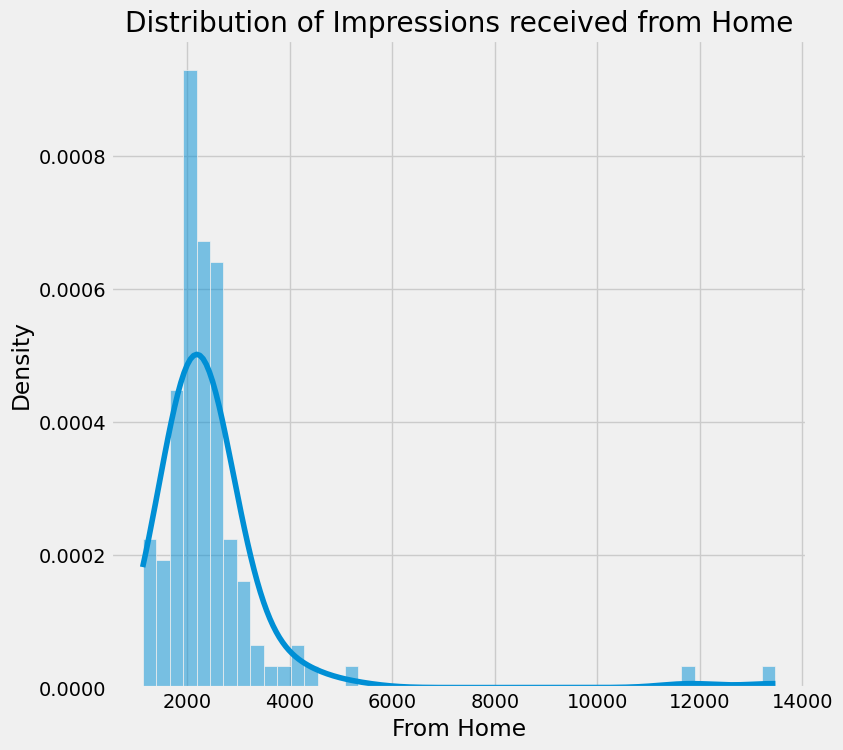

In [10]:
# Distribution of impressions received from Home

plt.figure(figsize = (8,8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions received from Home")
sns.histplot(data['From Home'],kde = True,stat = 'density')
plt.show()

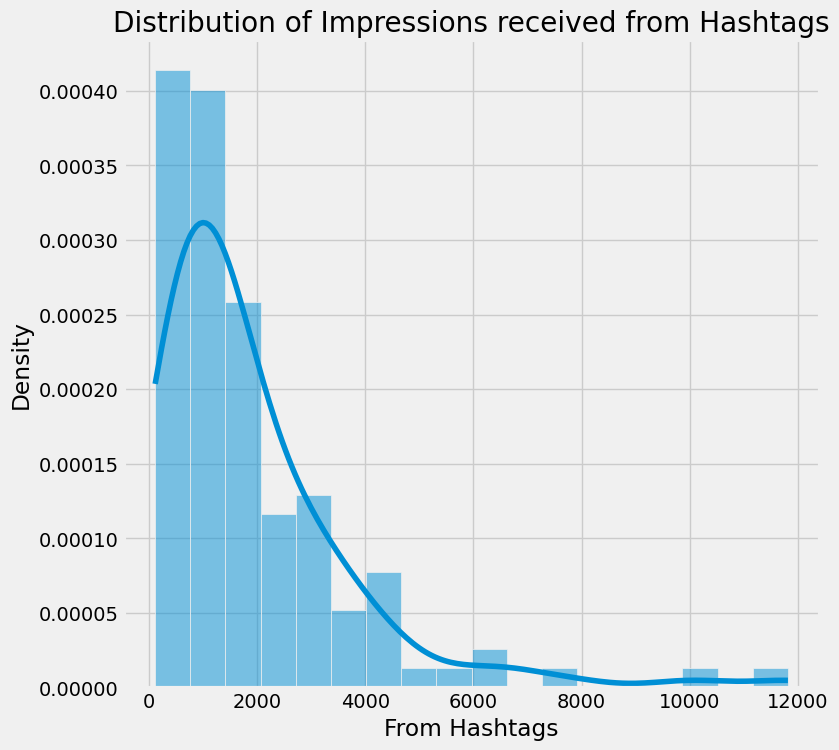

In [11]:
# Distribution of impressions received from Hashtags

plt.figure(figsize = (8,8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions received from Hashtags")
sns.histplot(data['From Hashtags'],kde = True,stat = 'density')
plt.show()

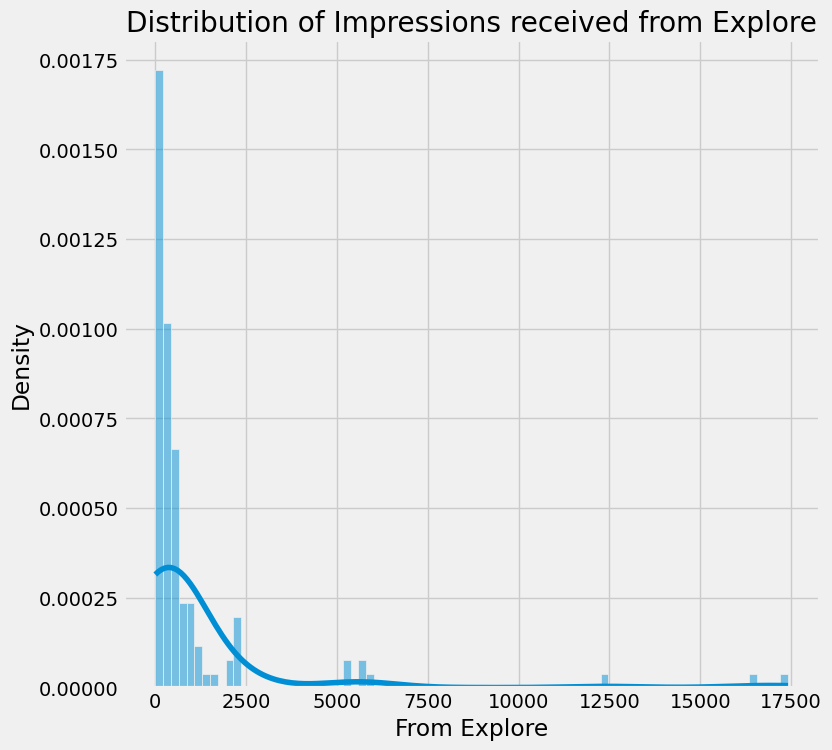

In [12]:
# Distribution of impressions received from Explore section

plt.figure(figsize = (8,8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions received from Explore")
sns.histplot(data['From Explore'],kde = True,stat = 'density')
plt.show()

In [14]:
# Precenatge of impressions from various sources

home = data['From Home'].sum()
hashtags = data['From Hashtags'].sum()
explore = data['From Explore'].sum()
other = data['From Other'].sum()

labels = ['From Home','From Hashtags','Fro Explore','From Others']
values = [home,hashtags,explore,other]

fig = pxa.pie(data,values = values,names = labels, title = "Impressions on Insta posts from various sources")
fig.show()

From above pie chart, we can see that almost 50% reach is from followers, 33% from Hashtags, 19% from Explore section and 3% from Other sources.

Let's analyze content of posts now. There are 2 objects type columns in dataset namely, Caption and Hashtags. These will help us understand the kind of content posted on Instagram.

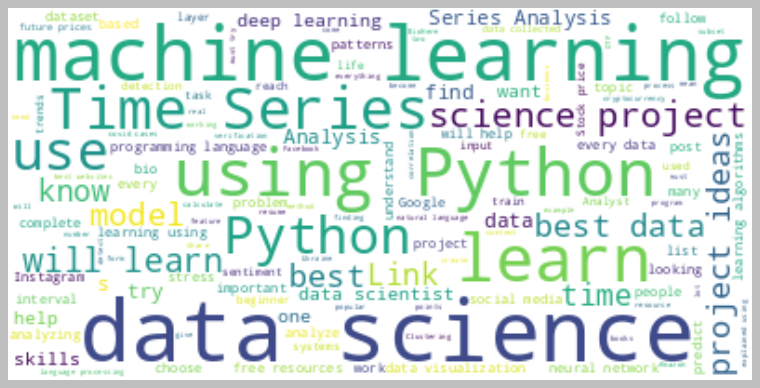

In [15]:
# Creating a wordcloud of caption column to look at the most used words in the caption

text = ''.join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords,background_color = 'white').generate(text)
plt.style.use('classic')
plt.figure(figsize = (12,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

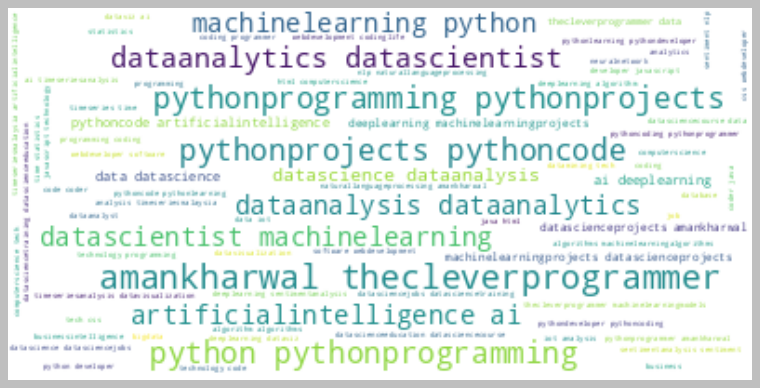

In [16]:
# Creating a wordcloud of caption column to look at the most used words in the hashtags

text = ''.join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords,background_color = 'white').generate(text)
plt.style.use('classic')
plt.figure(figsize = (12,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

Let's look at various factors which can be used to get a better understanding of the reach and impressions of posts.

In [17]:
# Relation b/w number of likes and number of impressions on posts

figure = pxa.scatter(data,x='Impressions',y='Likes',size='Likes',trendline='ols',title='Relationship between Likes and Impressions')
figure.show()

In [18]:
# Relation b/w number of comments and number of impressions on posts

figure = pxa.scatter(data,x='Impressions',y='Comments',size='Comments',trendline='ols',title='Relationship between Comments and Impressions')
figure.show()

In [19]:
# Relation b/w number of shares and number of impressions on posts

figure = pxa.scatter(data,x='Impressions',y='Shares',size='Shares',trendline='ols',title='Relationship between Shares and Impressions')
figure.show()

In [20]:
# Relation b/w number of saves and number of impressions on posts

figure = pxa.scatter(data,x='Impressions',y='Saves',size='Saves',trendline='ols',title='Relationship between Saves and Impressions')
figure.show()

In [21]:
# Coorelation of all columns with Impressions column

correlation = data.corr()
print(correlation['Impressions'].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


<ipython-input-21-2cd5fa69b231>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



We can say from above correaltion data that, Likes and Saves can help in increasing the reach more. Shares will not be affecting that much on the reach which was shown from the scatter plot also.

In [24]:
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares', 'Follows']])
y = np.array(data["Impressions"])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
model = PassiveAggressiveRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8463822653891921